In [ ]:
import pandas as pd
from fbprophet import Prophet
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
air_passenger_data = pd.read_csv('https://raw.githubusercontent.com/AileenNielsen/TimeSeriesAnalysisWithPython/master/data/AirPassengers.csv')

In [ ]:
air_passenger_data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


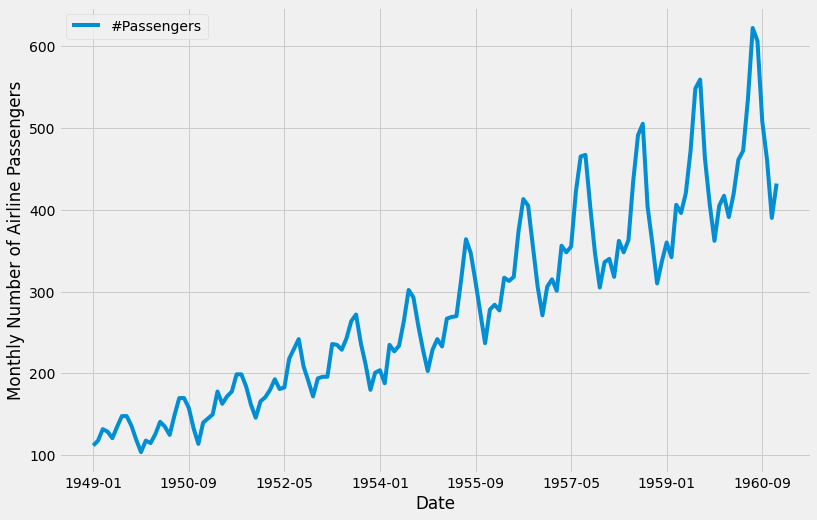

In [ ]:
plt.style.use('fivethirtyeight')
ax = air_passenger_data.set_index('Month').plot(figsize=(12, 8))
ax.set_ylabel('Monthly Number of Airline Passengers')
ax.set_xlabel('Date')
plt.show()

In [ ]:
# set the uncertainty interval to 95% (the Prophet default is 80%)
my_model = Prophet(interval_width=0.95)

In [ ]:
my_model.fit(air_passenger_data)

ValueError: ignored

In [ ]:
air_passenger_data.rename(columns={"Month": 'ds', '#Passengers':'y'}, inplace=True)
air_passenger_data.head()

,ds,y
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


# Additive model

In [ ]:
my_model.fit(air_passenger_data)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future_dates = my_model.make_future_dataframe(periods=36, freq='MS')
future_dates.tail()

,ds
175,1963-08-01
176,1963-09-01
177,1963-10-01
178,1963-11-01
179,1963-12-01


In [ ]:
forecast = my_model.predict(future_dates)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
175,1963-08-01,582.537709,607.663057,695.974223,577.427151,587.239367,67.521950,67.521950,67.521950,67.521950,67.521950,67.521950,0.0,0.0,0.0,650.059659
176,1963-09-01,585.660329,561.300236,645.517786,580.269535,590.598544,17.095473,17.095473,17.095473,17.095473,17.095473,17.095473,0.0,0.0,0.0,602.755802
177,1963-10-01,588.682220,523.172367,611.724166,582.915208,593.819031,-22.112557,-22.112557,-22.112557,-22.112557,-22.112557,-22.112557,0.0,0.0,0.0,566.569663
178,1963-11-01,591.804840,490.961474,575.374483,585.753384,597.164708,-57.071598,-57.071598,-57.071598,-57.071598,-57.071598,-57.071598,0.0,0.0,0.0,534.733242
179,1963-12-01,594.826730,518.971569,605.559100,588.526121,600.397826,-30.463403,-30.463403,-30.463403,-30.463403,-30.463403,-30.463403,0.0,0.0,0.0,564.363327


In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
175,1963-08-01,650.059659,607.663057,695.974223
176,1963-09-01,602.755802,561.300236,645.517786
177,1963-10-01,566.569663,523.172367,611.724166
178,1963-11-01,534.733242,490.961474,575.374483
179,1963-12-01,564.363327,518.971569,605.559100


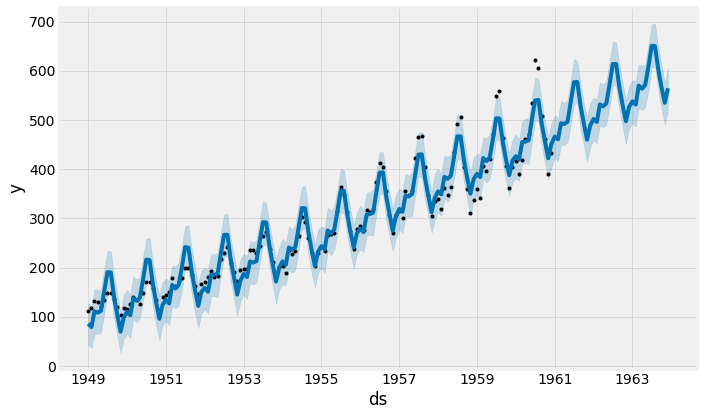

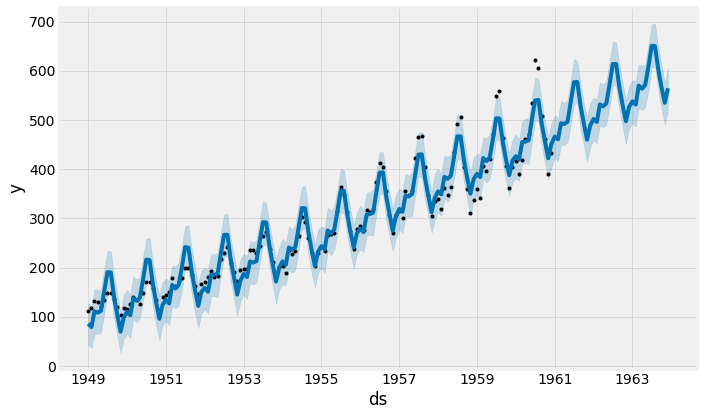

In [ ]:
my_model.plot(forecast,
              uncertainty=True)

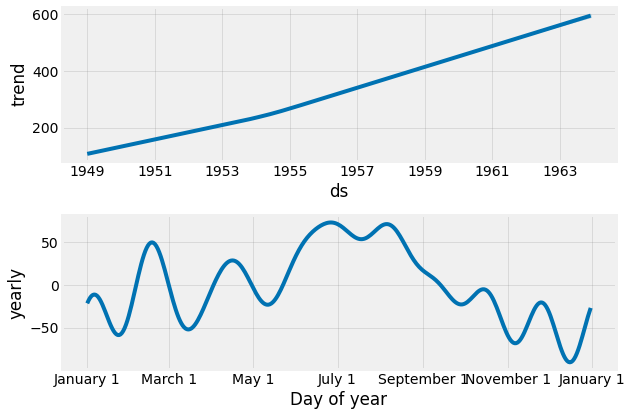

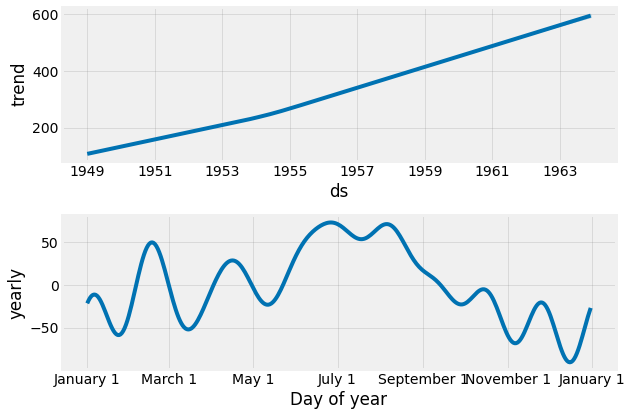

In [ ]:
my_model.plot_components(forecast)


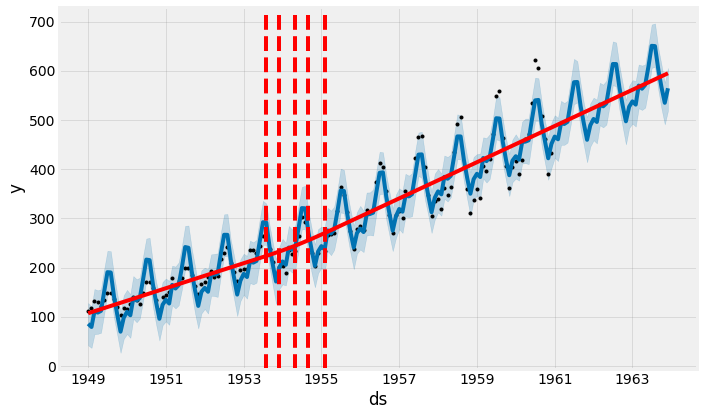

In [ ]:
from fbprophet.plot import add_changepoints_to_plot
fig_air=my_model.plot(forecast)
a=add_changepoints_to_plot(fig_air.gca(),my_model, forecast)

# Multiplicative

In [ ]:
my_model_multiplicative = Prophet(interval_width=0.95, seasonality_mode='multiplicative')

In [ ]:
my_model_multiplicative.fit(air_passenger_data)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future_dates = my_model_multiplicative.make_future_dataframe(periods=36, freq='MS')
future_dates.tail()

,ds
175,1963-08-01
176,1963-09-01
177,1963-10-01
178,1963-11-01
179,1963-12-01


In [ ]:
forecast = my_model_multiplicative.predict(future_dates)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
175,1963-08-01,604.942817,734.758062,792.403317,587.660733,623.423217,0.263644,0.263644,0.263644,0.263644,0.263644,0.263644,0.0,0.0,0.0,764.432415
176,1963-09-01,608.530702,620.429489,672.812690,590.466463,627.882410,0.061637,0.061637,0.061637,0.061637,0.061637,0.061637,0.0,0.0,0.0,646.038687
177,1963-10-01,612.002849,535.357044,591.289253,593.197332,632.410353,-0.082574,-0.082574,-0.082574,-0.082574,-0.082574,-0.082574,0.0,0.0,0.0,561.467107
178,1963-11-01,615.590734,463.070651,518.205781,595.817680,637.002989,-0.203263,-0.203263,-0.203263,-0.203263,-0.203263,-0.203263,0.0,0.0,0.0,490.463791
179,1963-12-01,619.062881,523.608488,577.289265,598.227159,641.386076,-0.113084,-0.113084,-0.113084,-0.113084,-0.113084,-0.113084,0.0,0.0,0.0,549.056896


In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
175,1963-08-01,764.432415,734.758062,792.403317
176,1963-09-01,646.038687,620.429489,672.812690
177,1963-10-01,561.467107,535.357044,591.289253
178,1963-11-01,490.463791,463.070651,518.205781
179,1963-12-01,549.056896,523.608488,577.289265


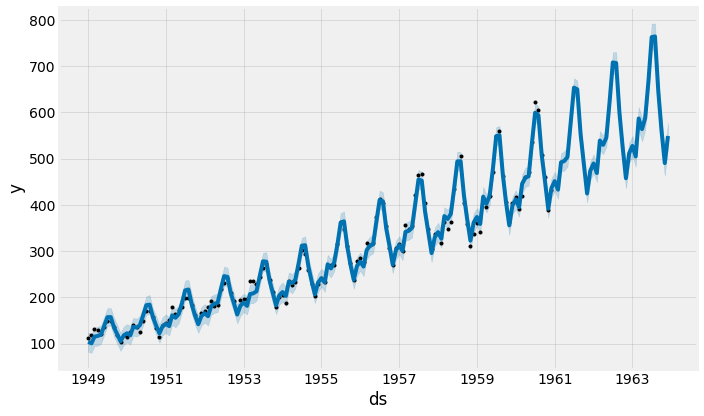

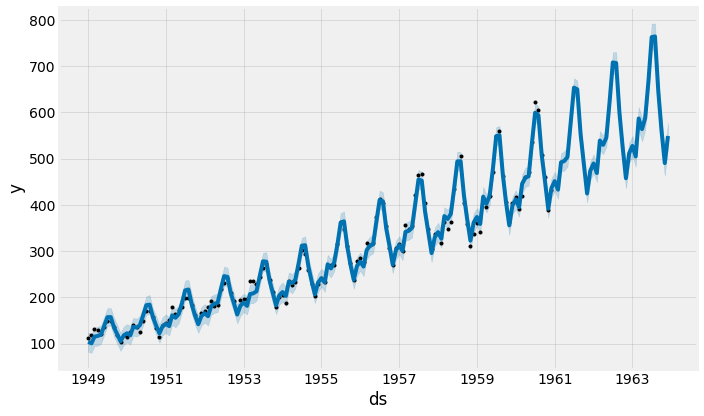

In [ ]:
my_model_multiplicative.plot(forecast,
              uncertainty=True)

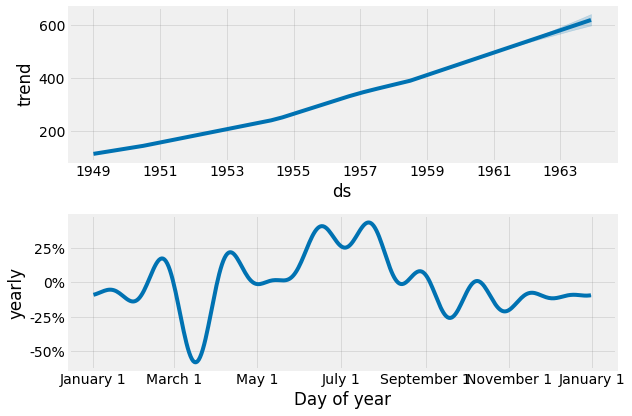

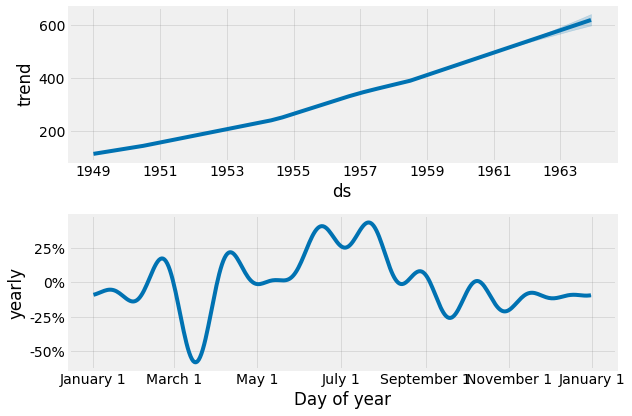

In [ ]:
my_model_multiplicative.plot_components(forecast)


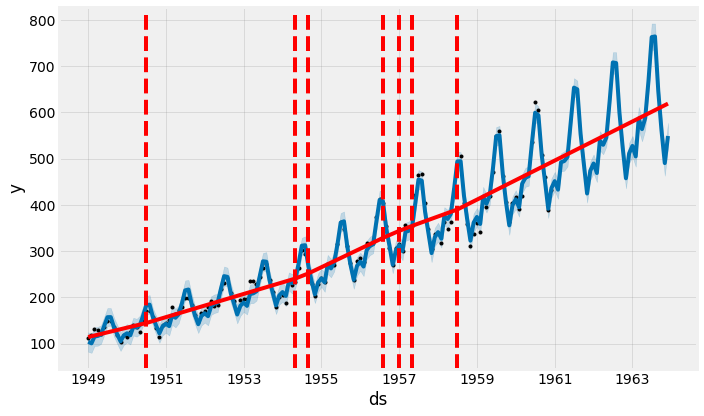

In [ ]:
from fbprophet.plot import add_changepoints_to_plot
fig_air=my_model_multiplicative.plot(forecast)
a=add_changepoints_to_plot(fig_air.gca(),my_model_multiplicative, forecast)